In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


In [2]:

plt.rc('font', family='NanumBarunGothic')
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF'  # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)


In [3]:
%matplotlib inline

import matplotlib as mpl

mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [42]:
df = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\Data Visualization\서울특별시 공공자전거 일별 대여건수_22.01-22.06.csv',encoding = 'cp949')
df2 = pd.read_csv('./서울특별시 공공자전거 대여이력 정보_22.05.csv',encoding = 'cp949')


In [43]:
df3 = pd.read_csv('./서울특별시 공공자전거 신규가입자 정보(월별)_22.01_22.06.csv',encoding = 'cp949')
df4 = pd.read_csv('./서울특별시 공공자전거 이용정보(시간대별)_22.05.csv',encoding = 'cp949')

In [5]:
df['대여일시'] = pd.to_datetime(df['대여일시'])

In [17]:
#df['요일'] = \
df['월'] =df['대여일시'].dt.month
df['요일']= df['대여일시'].dt.day_name()

In [7]:
df['월'] = df['월'].astype(str)

In [8]:
df['대여건수'] = df['대여건수'].str.replace(' ','').str.replace(',','')

In [9]:
df['대여건수'] = df['대여건수'].astype(float)

In [10]:
df_month = df.groupby('월').mean()

In [29]:
df = df[:180]

In [30]:
# 요일별 코로나 환자 수 다중 시계열 데이터 시각ㅎ화
df.columns

Index(['대여일시', '대여건수', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       '월', '요일'],
      dtype='object')

In [32]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'])


In [33]:
df

,대여일시,대여건수,월,요일
0,2022-01-01,29185.0,1.0,Saturday
1,2022-01-02,28914.0,1.0,Sunday
2,2022-01-03,53573.0,1.0,Monday
3,2022-01-04,56344.0,1.0,Tuesday
4,2022-01-05,57413.0,1.0,Wednesday
...,...,...,...,...
175,2022-06-25,146769.0,6.0,Saturday
176,2022-06-26,122474.0,6.0,Sunday
177,2022-06-27,94761.0,6.0,Monday
178,2022-06-28,112003.0,6.0,Tuesday


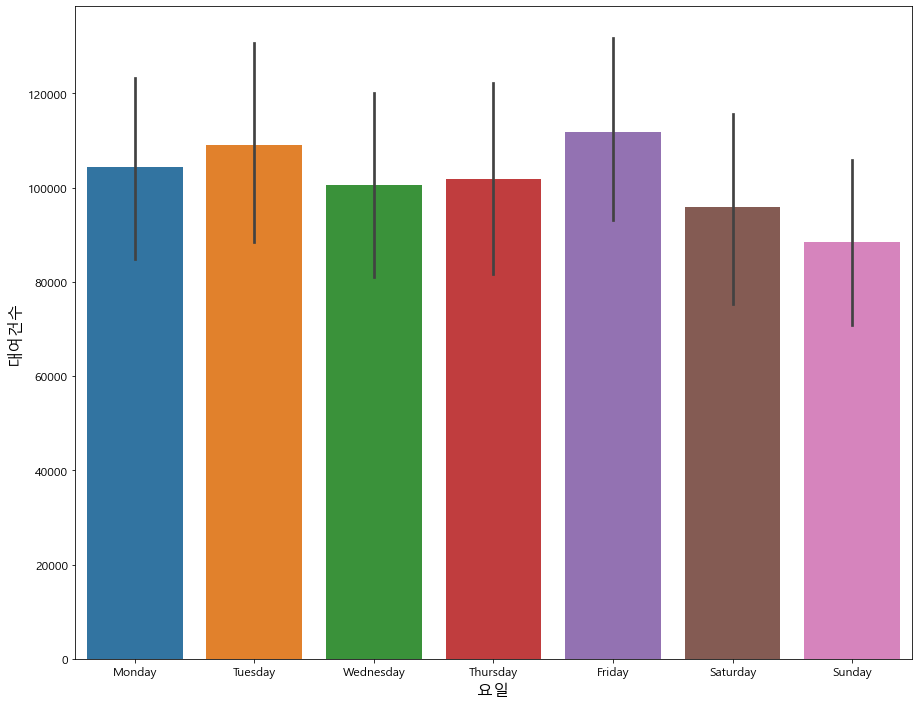

In [23]:
plt.figure(figsize=(15,12))
sns.barplot(data = df, x = df['요일'], y = df['대여건수'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

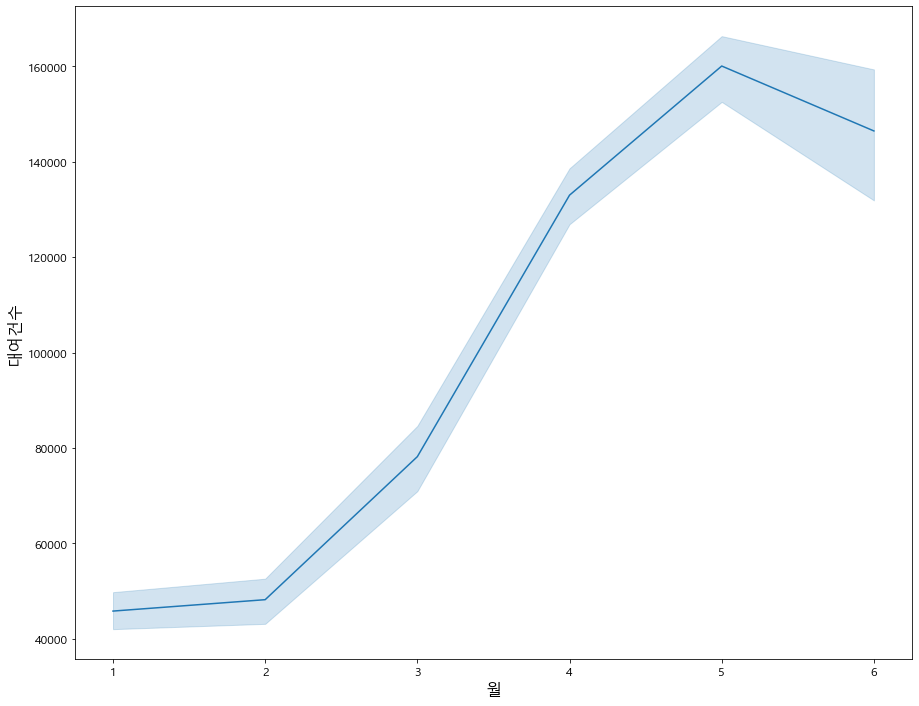

In [36]:
plt.figure(figsize=(15,12))
sns.lineplot(data = df, x= df['월'], y = df['대여건수'])
plt.show()

In [41]:
df2

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53010,2022-05-01 12:26:32,529,장한평역 8번 출구 앞,0,2022-05-01 12:32:32,3,중랑센터,0,6,1758.79
1,SPB-49262,2022-05-01 12:36:52,4819,면목동 새싹어린이공원 앞,0,2022-05-01 12:58:40,3,중랑센터,0,21,4200.00
2,SPB-36209,2022-05-02 06:36:38,529,장한평역 8번 출구 앞,0,2022-05-02 06:41:47,3,중랑센터,0,5,1121.03
3,SPB-43716,2022-05-02 06:40:32,529,장한평역 8번 출구 앞,0,2022-05-02 06:47:35,3,중랑센터,0,7,979.14
4,SPB-56785,2022-05-02 06:25:41,4819,면목동 새싹어린이공원 앞,0,2022-05-02 06:47:53,3,중랑센터,0,22,4380.00
...,...,...,...,...,...,...,...,...,...,...,...
4933655,SPB-40494,2022-05-27 09:32:08,9980,에이텍,0,2022-05-27 09:32:19,99999,영남단말기정비,0,0,0.00
4933656,SPB-39005,2022-05-27 15:36:25,9998,영남주차장 정비센터,0,2022-05-27 15:36:41,99999,영남단말기정비,0,0,0.00
4933657,SPB-52516,2022-05-30 16:03:25,99999,영남단말기정비,0,2022-05-30 16:05:33,99999,영남단말기정비,0,2,0.00
4933658,SPB-55541,2022-05-31 10:38:15,9998,영남주차장 정비센터,0,2022-05-31 10:38:41,99999,영남단말기정비,0,0,0.00


In [76]:
plt.figure(figsize=(15,12))
sns.regplot(data = df4, x = df4['운동량'],y = df2['이용시간(분)'],color = '#ACFA58', scatter = False)
plt.xlabel('운동량', fontsize=16)
plt.ylabel('이용시간', fontsize=16)
plt.title('이용 시간에 따른 운동량 추세선', fontsize=20)

KeyError: '이용시간(분)'

<Figure size 1080x864 with 0 Axes>

In [82]:
df4['연령대코드'].value_counts()

20대      1479534
30대      1005218
40대       592819
기타        453213
50대       383043
~10대      242626
60대       116346
70대이상      16424
Name: 연령대코드, dtype: int64

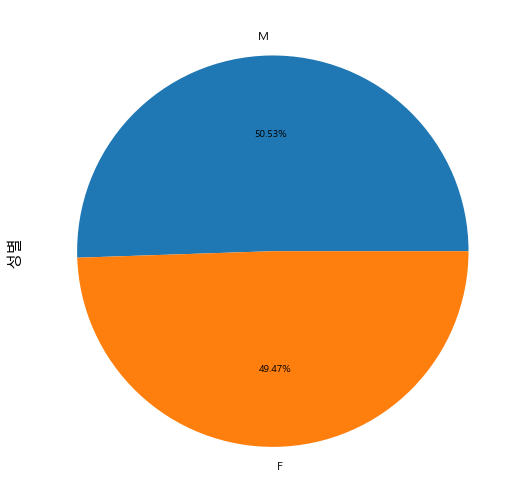

In [66]:
plt.figure(figsize = (12,9))
df3_sex = df3['성별'].value_counts()
df3_sex.plot.pie(autopct='%.2f%%')
plt.show()

In [86]:
#df3_group = 
df3.pivot('연령대코드', '성별', '가입 수')


ValueError: Index contains duplicate entries, cannot reshape

In [98]:
df4 = df4.dropna(axis=0)


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
546,2022-05-01,0,1036,1036. 고덕동 주양쇼핑,정기권,F,~10대,1,28.91,0.38,1622.17,10
547,2022-05-01,0,1643,1643. 태릉입구역 8번출구,정기권,F,~10대,1,137.93,1.44,6220.00,29
548,2022-05-01,0,1984,1984. 구로구청,정기권,F,~10대,1,67.56,0.84,3630.00,18
549,2022-05-01,0,1669,1669. 중계역 3번출구,정기권,F,~10대,1,177.76,1.68,7240.00,74
550,2022-05-01,0,647,647. 신이문역 1번출구,정기권,F,~10대,1,31.36,0.33,1440.00,16
...,...,...,...,...,...,...,...,...,...,...,...,...
4289218,2022-05-31,23,1627,1627. 수락산역 4번출구,정기권,M,기타,1,41.01,0.38,1618.18,9
4289219,2022-05-31,23,1221,1221. 삼전역 4번출구,정기권,M,기타,2,98.26,1.16,4986.13,101
4289220,2022-05-31,23,390,390. 충무로역 1번출구,정기권,M,기타,1,27.59,0.20,860.00,6
4289221,2022-05-31,23,3500,3500. 군자역2번출구,정기권,M,기타,1,43.24,0.36,1560.00,53


(0.0, 110.0)

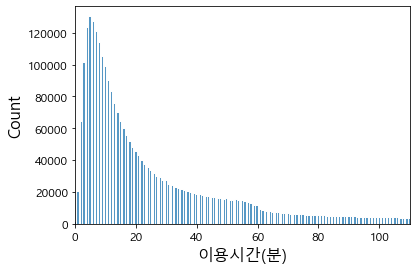

In [139]:
sns.histplot(data=df4['이용시간(분)'])
plt.xlim(0,110)

In [112]:
df4_sample = df4[:10000]



In [117]:
df4_sample['성별'] = df4_sample['성별'].str.replace('m','M')


<ipython-input-117-7154ba778f00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_sample['성별'] = df4_sample['성별'].str.replace('m','M')


In [118]:
df4_sample['성별'] = df4_sample['성별'].str.replace('f','F')


<ipython-input-118-8160c9830ef2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_sample['성별'] = df4_sample['성별'].str.replace('f','F')


(0.0, 40000.0)

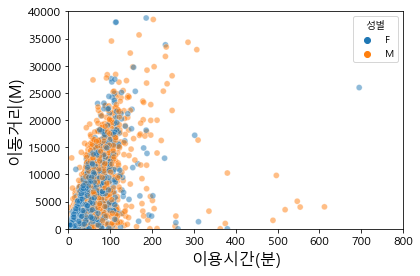

In [119]:
sns.scatterplot(x= df4_sample['이용시간(분)'],y= df4_sample['이동거리(M)'],hue = df4_sample['성별'],alpha=0.5)
plt.xlim(0,800)
plt.ylim(0,40000)

In [120]:
df3

,가입일시,사용자코드,연령대코드,성별,가입 수
0,202201,회원-내국인,10대,F,112
1,202201,회원-내국인,10대,F,997
2,202201,회원-내국인,10대,M,89
3,202201,회원-내국인,10대,M,1264
4,202201,회원-내국인,20대,F,198
...,...,...,...,...,...
183,202206,회원-내국인,70대이상,M,171
184,202206,회원-내국인,기타,F,1
185,202206,회원-내국인,기타,F,331
186,202206,회원-내국인,기타,M,4


In [133]:
#df3 =  
df3_hea = pd.pivot_table(df3, index = ['연령대코드'],columns=['가입일시'] ,values = '가입 수', aggfunc = 'sum')
df3_hea

가입일시,202201,202202,202203,202204,202205,202206
연령대코드,,,,,,
10대,2462,3327,6052,10941,15738,8494
20대,4892,6811,17082,38556,38819,25932
30대,2368,3266,8176,21022,21090,15660
40대,1635,2301,5593,12564,13331,10165
50대,1028,1365,2974,6181,6943,5660
60대,345,480,955,1900,2021,1725
70대이상,76,61,159,315,358,282
기타,52,76,199,430,486,422


<AxesSubplot:xlabel='가입일시', ylabel='연령대코드'>

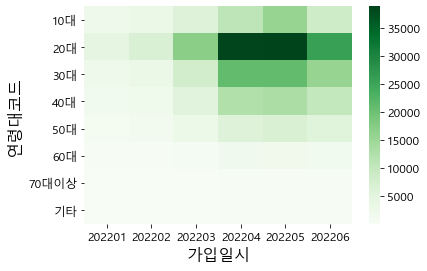

In [129]:
sns.heatmap(df3_hea,cmap = 'Greens')

In [136]:
df_33 = df3_hea.reset_index()
df_33

가입일시,연령대코드,202201,202202,202203,202204,202205,202206
0,10대,2462,3327,6052,10941,15738,8494
1,20대,4892,6811,17082,38556,38819,25932
2,30대,2368,3266,8176,21022,21090,15660
3,40대,1635,2301,5593,12564,13331,10165
4,50대,1028,1365,2974,6181,6943,5660
5,60대,345,480,955,1900,2021,1725
6,70대이상,76,61,159,315,358,282
7,기타,52,76,199,430,486,422


ValueError: Could not interpret value `연령대코드` for parameter `y`